## **Normalizations**

In [21]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv("wine_data.csv",header = None,usecols =[0,1,2])
df.columns = ['Class label','Alcohol','Malic acid']
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


1. kdeplot

<AxesSubplot: xlabel='Class label', ylabel='Density'>

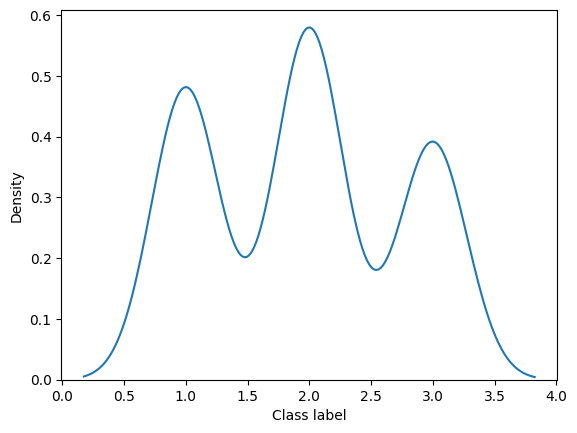

In [23]:
plt.Figure(figsize=(7,5))
sns.kdeplot(df['Class label'])

<AxesSubplot: xlabel='Alcohol', ylabel='Density'>

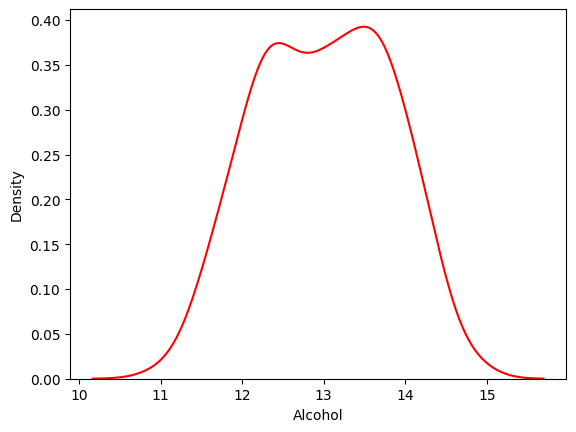

In [24]:
sns.kdeplot(df['Alcohol'],color='red')

<AxesSubplot: xlabel='Malic acid', ylabel='Density'>

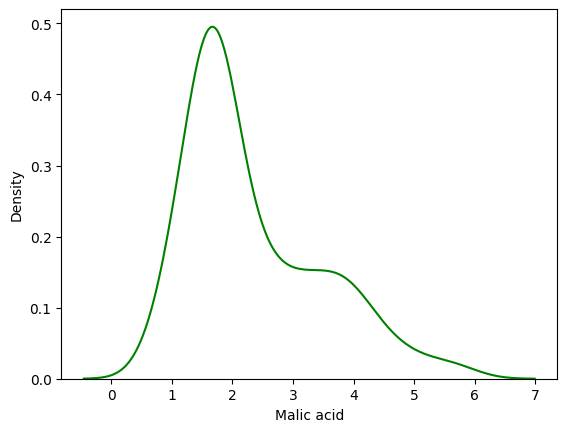

In [25]:
sns.kdeplot(df['Malic acid'],color='green')

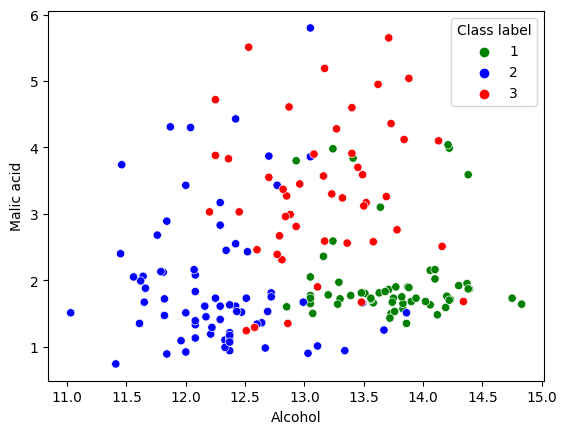

In [31]:
sns.scatterplot(x='Alcohol', y='Malic acid', hue='Class label', data=df,palette =['green','blue','red'])
plt.show()

**data Splittting**

In [32]:
X = df.drop('Class label',axis=1)
y = df['Class label']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state=0)

In [37]:
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [46]:
X_train.scaled = scaler.transform(X_train)
X_test.scaled = scaler.transform(X_test)

In [51]:
X_train.scaled = pd.DataFrame(X_train.scaled,columns = X_train.columns)
X_test.scaled  = pd.DataFrame(X_test.scaled,columns = X_train.columns)

In [69]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [71]:
# Min = 0 ,Max = 1
np.round(X_train.scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


##### **Alcohol Column Distribution Before and After Normalization (MinMaxScalar)**
Range  is 0 to 1 

Min = 0

Max = 1

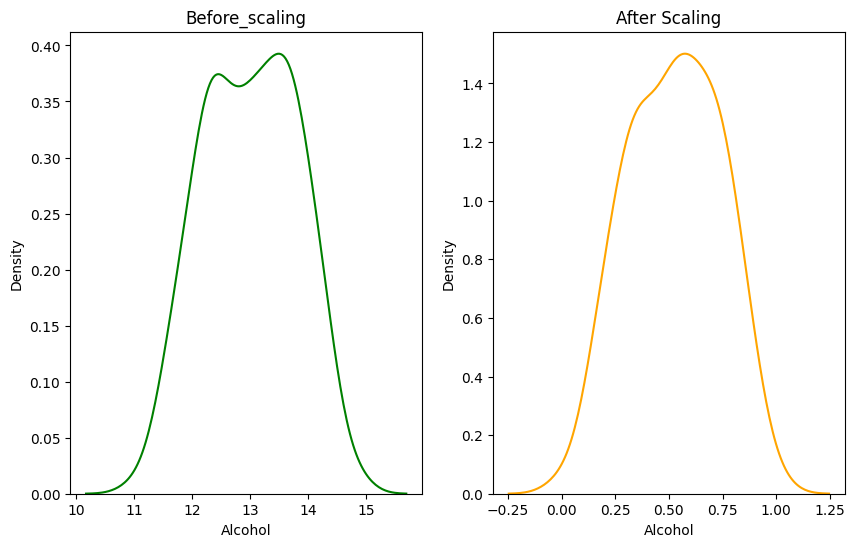

In [60]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,6))
ax1.set_title("Before_scaling Distribution")
sns.kdeplot(df['Alcohol'],ax= ax1,color='green')
ax2.set_title("After Scaling Distribution ")
sns.kdeplot(X_train.scaled['Alcohol'],ax= ax2,color='orange')
plt.show()

##### **Malic acid Column Distribution Before and After Normalization (MinMaxScalar)**
Range  is 0 to 1 

Min = 0

Max = 1

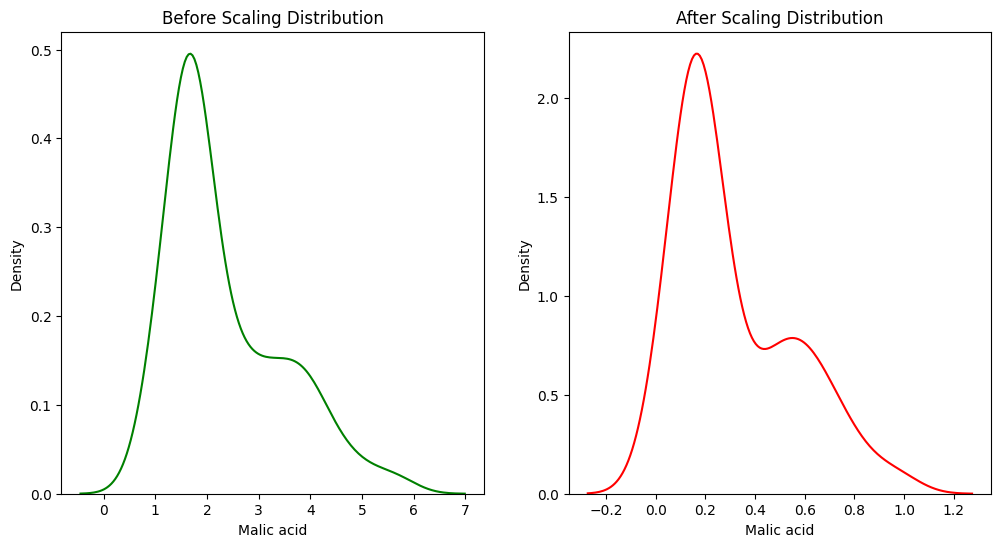

In [89]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))

ax1.set_title("Before Scaling Distribution")
sns.kdeplot(df['Malic acid'],color='green',ax= ax1)

ax2.set_title("After Scaling Distribution")
sns.kdeplot(X_train.scaled['Malic acid'],color='red',ax= ax2)
plt.show()

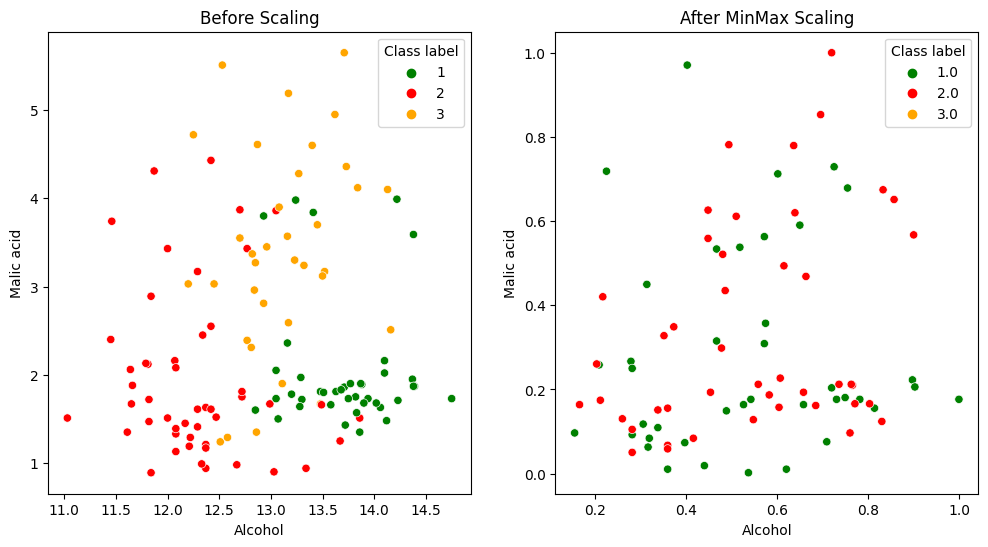

In [90]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))
ax1.set_title("Before Scaling")
sns.scatterplot(x = X_train['Alcohol'],y = X_train['Malic acid'],hue=y_train,ax = ax1,palette = ['green','red','orange'])
ax2.set_title("After MinMax Scaling")
sns.scatterplot(x = X_train.scaled['Alcohol'],y = X_train.scaled['Malic acid'],hue=y_train,ax = ax2,palette = ['green','red','orange'])
plt.show()

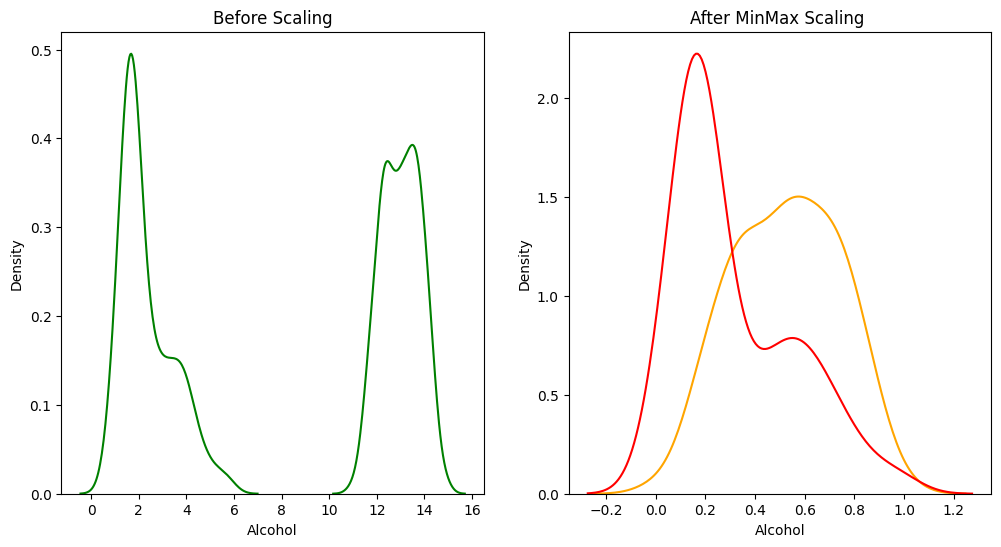

In [91]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))

ax1.set_title("Before Scaling")
sns.kdeplot(df['Alcohol'],ax= ax1,color='green')
sns.kdeplot(df['Malic acid'],color='green',ax= ax1)


ax2.set_title("After MinMax Scaling ")
sns.kdeplot(X_train.scaled['Alcohol'],ax= ax2,color='orange')
sns.kdeplot(X_train.scaled['Malic acid'],color='red',ax= ax2)

plt.show()